In [3]:
!gdown 1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC

Downloading...
From: https://drive.google.com/uc?id=1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC
To: C:\Users\Davor\Desktop\vnp_vezbajne\climate-data.csv

  0%|          | 0.00/78.1k [00:00<?, ?B/s]
100%|##########| 78.1k/78.1k [00:00<00:00, 565kB/s]
100%|##########| 78.1k/78.1k [00:00<00:00, 565kB/s]


In [59]:
 import pandas as pd
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,mean_absolute_error,mean_squared_error,r2_score


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import xgboost as xgb




In [60]:
df = pd.read_csv("climate-data.csv")
df 

date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]

In [61]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

In [62]:
df

meantemp    humidity  wind_speed  meanpressure
date                                                       
2013-01-01  10.000000   84.500000    0.000000   1015.666667
2013-01-02   7.400000   92.000000    2.980000   1017.800000
2013-01-03   7.166667   87.000000    4.633333   1018.666667
2013-01-04   8.666667   71.333333    1.233333   1017.166667
2013-01-05   6.000000   86.833333    3.700000   1016.500000
...               ...         ...         ...           ...
2016-12-28  17.217391   68.043478    3.547826   1015.565217
2016-12-29  15.238095   87.857143    6.000000   1016.904762
2016-12-30  14.095238   89.666667    6.266667   1017.904762
2016-12-31  15.052632   87.000000    7.325000   1016.100000
2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 4 columns]

In [63]:
features=['meantemp','humidity','wind_speed','meanpressure']

In [64]:
df_sel=df[features]

In [65]:
for feature in features:
    for i in range(1,4):
        df_sel[f'{feature}_lag_{i}'] = df_sel[feature].shift(i)

In [66]:
df_sel

meantemp    humidity  wind_speed  meanpressure  meantemp_lag_1  \
date                                                                          
2013-01-01  10.000000   84.500000    0.000000   1015.666667             NaN   
2013-01-02   7.400000   92.000000    2.980000   1017.800000       10.000000   
2013-01-03   7.166667   87.000000    4.633333   1018.666667        7.400000   
2013-01-04   8.666667   71.333333    1.233333   1017.166667        7.166667   
2013-01-05   6.000000   86.833333    3.700000   1016.500000        8.666667   
...               ...         ...         ...           ...             ...   
2016-12-28  17.217391   68.043478    3.547826   1015.565217       16.850000   
2016-12-29  15.238095   87.857143    6.000000   1016.904762       17.217391   
2016-12-30  14.095238   89.666667    6.266667   1017.904762       15.238095   
2016-12-31  15.052632   87.000000    7.325000   1016.100000       14.095238   
2017-01-01  10.000000  100.000000    0.000000   1016.000000       15.052632   

            meantemp_lag_2  meantemp_lag_3  humidity_lag_1  humidity_lag_2  \
date                                                                         
2013-01-01             NaN             NaN             NaN             NaN   
2013-01-02             NaN             NaN       84.500000             NaN   
2013-01-03       10.000000             NaN       92.000000       84.500000   
2013-01-04        7.400000       10.000000       87.000000       92.000000   
2013-01-05        7.166667        7.400000       71.333333       87.000000   
...                    ...             ...             ...             ...   
2016-12-28       17.142857       14.000000       67.550000       74.857143   
2016-12-29       16.850000       17.142857       68.043478       67.550000   
2016-12-30       17.217391       16.850000       87.857143       68.043478   
2016-12-31       15.238095       17.217391       89.666667       87.857143   
2017-01-01       14.095238       15.238095       87.000000       89.666667   

            humidity_lag_3  wind_speed_lag_1  wind_speed_lag_2  \
date                                                             
2013-01-01             NaN               NaN               NaN   
2013-01-02             NaN          0.000000               NaN   
2013-01-03             NaN          2.980000          0.000000   
2013-01-04       84.500000          4.633333          2.980000   
2013-01-05       92.000000          1.233333          4.633333   
...                    ...               ...               ...   
2016-12-28       94.300000          8.335000          8.784211   
2016-12-29       74.857143          3.547826          8.335000   
2016-12-30       67.550000          6.000000          3.547826   
2016-12-31       68.043478          6.266667          6.000000   
2017-01-01       87.857143          7.325000          6.266667   

            wind_speed_lag_3  meanpressure_lag_1  meanpressure_lag_2  \
date                                                                   
2013-01-01               NaN                 NaN                 NaN   
2013-01-02               NaN         1015.666667                 NaN   
2013-01-03               NaN         1017.800000         1015.666667   
2013-01-04          0.000000         1018.666667         1017.800000   
2013-01-05          2.980000         1017.166667         1018.666667   
...                      ...                 ...                 ...   
2016-12-28          9.085000         1017.200000         1016.952381   
2016-12-29          8.784211         1015.565217         1017.200000   
2016-12-30          8.335000         1016.904762         1015.565217   
2016-12-31          3.547826         1017.904762         1016.904762   
2017-01-01          6.000000         1016.100000         1017.904762   

            meanpressure_lag_3  
date                            
2013-01-01                 NaN  
2013-01-02                 NaN  
2013-01-03                 NaN  
2013-01-0

In [67]:
df_sel.isnull().sum()

meantemp              0
humidity              0
wind_speed            0
meanpressure          0
meantemp_lag_1        1
meantemp_lag_2        2
meantemp_lag_3        3
humidity_lag_1        1
humidity_lag_2        2
humidity_lag_3        3
wind_speed_lag_1      1
wind_speed_lag_2      2
wind_speed_lag_3      3
meanpressure_lag_1    1
meanpressure_lag_2    2
meanpressure_lag_3    3
dtype: int64

In [68]:
 df_sel= df_sel.dropna()

In [69]:
df_sel.isnull().sum()

meantemp              0
humidity              0
wind_speed            0
meanpressure          0
meantemp_lag_1        0
meantemp_lag_2        0
meantemp_lag_3        0
humidity_lag_1        0
humidity_lag_2        0
humidity_lag_3        0
wind_speed_lag_1      0
wind_speed_lag_2      0
wind_speed_lag_3      0
meanpressure_lag_1    0
meanpressure_lag_2    0
meanpressure_lag_3    0
dtype: int64

In [70]:
X=df_sel.drop('meantemp',axis=1)#sve osven meantem da ima vo tabela
Y=df_sel['meantemp'] #target dropnata

In [71]:
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

X shape: (1459, 15)
Y shape: (1459,)


In [72]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=42) 

In [73]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1167, 15)
y_train shape: (1167,)
X_test shape: (292, 15)
y_test shape: (292,)


In [74]:
 rf_model =RandomForestRegressor(n_estimators =100,random_state=42)

In [75]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [76]:
y_pred =rf_model.predict(X_test)

In [77]:
mae = mean_absolute_error(y_test,y_pred) #za predividvuajne
mse =mean_squared_error (y_test,y_pred)
rf_rmse = mean_squared_error(y_test,y_pred,squared=False)
r2=r2_score(y_test,y_pred)

In [78]:
print(f"Mae {mae}")
print(f"Mse {mse}")
print(f"rf_rmse {rf_rmse}")
print(f"r2 {r2}") #so poblisku do 0 podobar model

Mae 0.9536228973752587
Mse 1.5762256633186744
rf_rmse 1.2554782607909523
r2 0.9708847571076201


<function matplotlib.pyplot.show(close=None, block=None)>

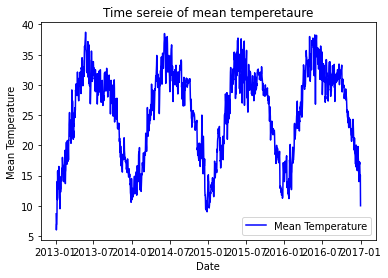

In [79]:
plt.plot(df_sel['meantemp'],label="Mean Temperature",color='blue')
plt.title("Time sereie of mean temperetaure")
plt.xlabel ("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show


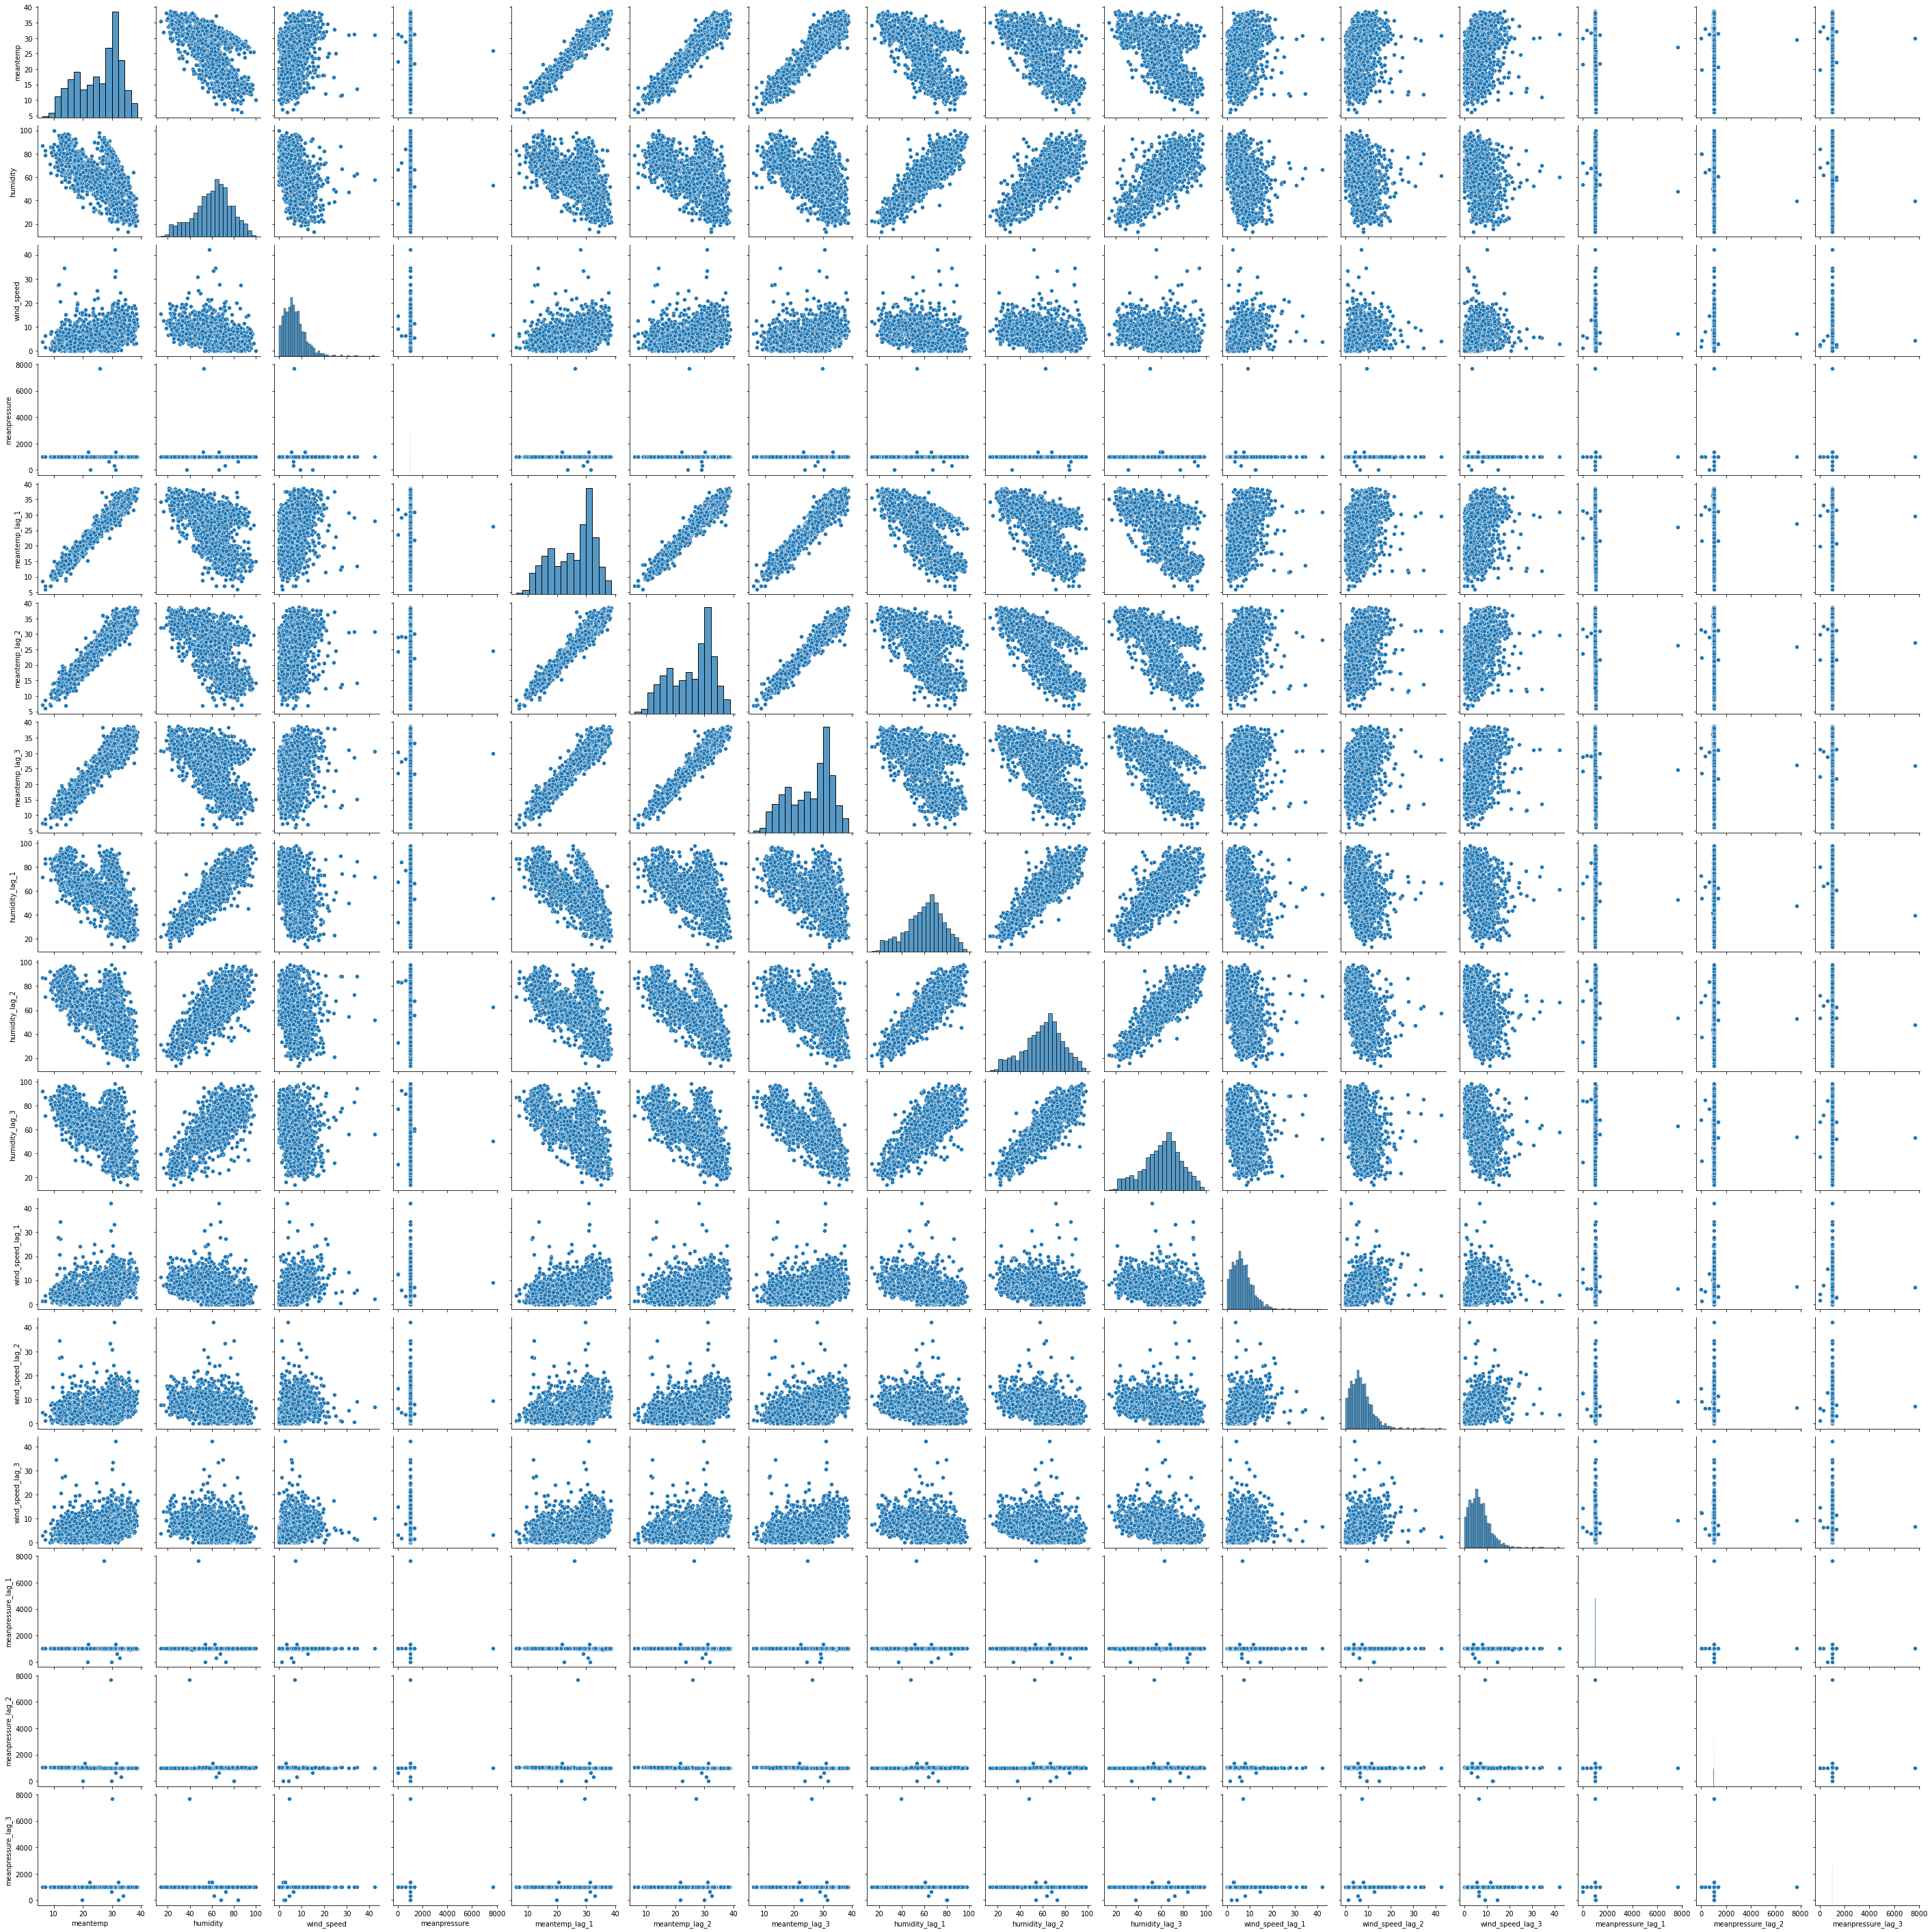

In [80]:
lag_features=[f'{feature}_lag_{i}' for feature in fet
    for i in range (1,4)]
lag_features.append('meantemp')

sns.pairplot(df_sel)
plt.show()
 

In [89]:
model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 100,random_state=42)

# Add silent=True to avoid printing out updates with each cycle


In [90]:
model.fit(X_train, y_train)




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [91]:
# make predictions
xgb_pred = model.predict(X_test)

In [93]:
maexgb= mean_absolute_error(y_test,xgb_pred)
msexgb =mean_squared_error (y_test,y_pred)
rf_rmsexgb = mean_squared_error(y_test,y_pred,squared=False)
r2xgb=r2_score(y_test,y_pred)

In [95]:
print(f"X_train shape: {maexgb}")
print(f"y_train shape: {msexgb}")
print(f"X_test shape: {rf_rmsexgb}")
print(f"y_test shape: {r2xgb}") # ne elos rezultatot so go dobive 0.5 0.3 e blisku do perfekcija

X_train shape: 1.0080479318327957
y_train shape: 1.7348883386391043
X_test shape: 1.317151600476993
y_test shape: 0.9679540204514342


In [96]:
param_grid = {'n_estimators': [50,100,150,200,250]}

In [ ]:
tscv = Time